# Nom

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
mpl.rcParams.update(rcParams)

## Tension résiduelle

Il y a une tension résiduelle parce que dans le contexte du laboratoire il n'y avait pas d'isolement de l'échantillon des champs magnétiques crées par les cables, les bobines, la Terre et toute autre source de champ électromagnétique.

## InP 2µm, configuration $I_{24}, V_{13}$

In [2]:
data1 = pd.read_csv("../data/VInP2micro(B).csv", delimiter=",")
data1

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,7.15,0.9994,30.615,0.1015,0.001,0.01
1,49.20,1.0005,64.048,0.7920,0.001,0.01
2,97.80,1.0012,104.955,1.2780,0.001,0.01
3,126.10,0.9995,125.518,1.5610,0.001,0.01
4,157.90,0.9991,150.200,1.8790,0.001,0.05
5,191.40,0.9986,178.196,2.2140,0.001,0.05
6,230.10,0.9977,209.644,2.6010,0.001,0.05
7,249.20,0.9969,225.253,2.7920,0.001,0.05
8,269.20,0.9965,241.534,2.9920,0.001,0.05
9,290.20,0.9959,258.574,3.2020,0.001,0.05


In [3]:
B1 = unp.uarray(data1["B [mT]"], data1["deltaB"])
I1 = unp.uarray(data1["I(in) [mA]"], data1["deltaI"])
U1 = unp.uarray(data1["U [mV]"], data1["deltaU"])

In [4]:
data3 = pd.read_csv("../data/VInP1micro(B).csv", delimiter=",")
data3

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,7.64,1.0019,67.203,0.1064,0.001,0.01
1,52.50,1.0019,167.855,0.8250,0.001,0.01
2,97.50,1.0019,259.109,1.2750,0.001,0.01
3,156.90,1.0019,402.807,1.8690,0.001,0.01
4,207.10,1.0019,515.120,2.3710,0.001,0.01
5,250.60,1.0019,612.300,2.8060,0.001,0.10
6,288.70,1.0019,696.970,3.1870,0.001,0.10
7,335.00,1.0019,796.300,6.3500,0.001,0.10
8,350.00,1.0019,829.360,6.5000,0.001,0.10
9,-5.07,1.0045,38.872,0.0807,0.001,0.01


In [5]:
B2 = unp.uarray(data3["B [mT]"], data3["deltaB"])
I2 = unp.uarray(data3["I(in) [mA]"], data3["deltaI"])
U2 = unp.uarray(data3["U [mV]"], data3["deltaU"])

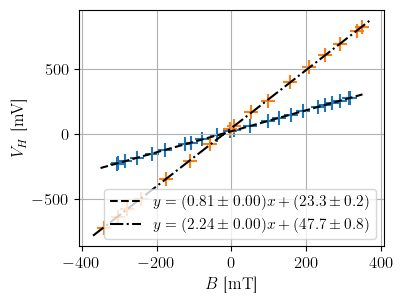

In [6]:
plt.scatter(unp.nominal_values(B1), unp.nominal_values(U1), marker='+')
# plt.errorbar(unp.nominal_values(B), unp.nominal_values(U), xerr=unp.std_devs(B), yerr=unp.std_devs(U))
plt.xlabel(r"$B$ [\si{\milli\tesla}]")
plt.ylabel(r"$V_H$ [\si{\milli\volt}]")

# Fit
coefs, cov = np.polyfit(unp.nominal_values(B1), unp.nominal_values(U1), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-350, 350, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.2fL})x + ({:.1uL})$".format(*coefserr), color='black')

# 1µm
plt.scatter(unp.nominal_values(B2), unp.nominal_values(U2))

# Fit
coefs, cov = np.polyfit(unp.nominal_values(B2), unp.nominal_values(U2), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-370, 370, 100)
plt.plot(x, fit(x), '-.', label=r"$y = ({:.2fL})x + ({:.1uL})$".format(*coefserr), color='black')


# plt.ticklabel_format(axis='both', style='sci', scilimits=(2,2))
plt.grid()
plt.legend()
plt.tight_layout(pad=0.5)
plt.savefig("../figures/U(B).pdf")

In [7]:
data1 = pd.read_csv("../data/IInP2micro(A).csv", delimiter=",")
data1

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,383,-1.0128,-289.124,6.83,0.001,0.01
1,383,-0.9342,-266.882,6.83,0.001,0.01
2,383,-0.7647,-218.997,6.83,0.001,0.01
3,383,-0.5658,-162.887,6.83,0.001,0.01
4,383,-0.3871,-112.456,6.83,0.001,0.01
5,383,-0.1828,-54.573,6.83,0.001,0.01
6,383,-0.0405,-14.256,6.83,0.001,0.01
7,383,0.0591,13.664,6.83,0.001,0.01
8,383,0.1697,44.617,6.83,0.001,0.01
9,383,0.2886,77.979,6.83,0.001,0.01


In [8]:
B1 = unp.uarray(data1["B [mT]"], data1["deltaB"])
I1 = unp.uarray(data1["I(in) [mA]"], data1["deltaI"])
U1 = unp.uarray(data1["U [mV]"], data1["deltaU"])

In [9]:
data3 = pd.read_csv("../data/IInP1micro(A).csv", delimiter=",")
data3

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,348,-0.9985,-841.810,6.48,0.001,0.01
1,348,-0.9073,-768.180,6.48,0.001,0.01
2,348,-0.7618,-647.380,6.48,0.001,0.01
3,348,-0.6639,-565.840,6.48,0.001,0.01
4,348,-0.5044,-433.040,6.48,0.001,0.01
5,348,-0.4068,-350.945,6.48,0.001,0.01
6,348,-0.2522,-220.981,6.48,0.001,0.01
7,348,-0.1088,-100.497,6.48,0.001,0.01
8,348,-0.0507,-51.492,6.48,0.001,0.01
9,348,0.0714,51.409,6.48,0.001,0.01


In [10]:
B2 = unp.uarray(data3["B [mT]"], data3["deltaB"])
I2 = unp.uarray(data3["I(in) [mA]"], data3["deltaI"])
U2 = unp.uarray(data3["U [mV]"], data3["deltaU"])

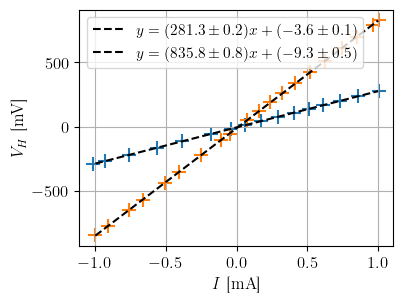

In [11]:
plt.scatter(unp.nominal_values(I1), unp.nominal_values(U1))
plt.xlabel(r"$I$ [\si{\milli\ampere}]")
plt.ylabel(r"$V_H$ [\si{\milli\volt}]")

# Fit
coefs, cov = np.polyfit(unp.nominal_values(I1), unp.nominal_values(U1), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-1, 1, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.1uL})x + ({:.1uL})$".format(*coefserr), color='black')

# 1µm
plt.scatter(unp.nominal_values(I2), unp.nominal_values(U2))

# Fit
coefs, cov = np.polyfit(unp.nominal_values(I2), unp.nominal_values(U2), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-1, 1, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.1uL})x + ({:.1uL})$".format(*coefserr), color='black')


# plt.ticklabel_format(axis='both', style='sci', scilimits=(2,2))
plt.grid()
plt.legend()
plt.tight_layout(pad=0.5)
plt.savefig("../figures/U(I).pdf")